# Data Analysis Interview Challenge

### Part 1 ‑ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [1]:
import pandas as pd
import json
import seaborn as sns
import datetime
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_json('logins.json')

In [3]:
data=data.sort_values(by='login_time')    # sorting dates in increasing order
data = data.reset_index()
data = data.drop('index', 1)
data.head()

,login_time
0,1970-01-01 20:12:16
1,1970-01-01 20:13:18
2,1970-01-01 20:16:10
3,1970-01-01 20:16:36
4,1970-01-01 20:16:37


In [4]:
data.describe()

,login_time
count,93142
unique,92265
top,1970-04-04 01:17:40
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [5]:
data['counts'] = 0
data.set_index('login_time', inplace=True)    # set the datetime column as the index
time_df = data.resample('15T').count()  
time_df.head()

,counts
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


Text(0.5,1,'Logins at 15 mins intervals')

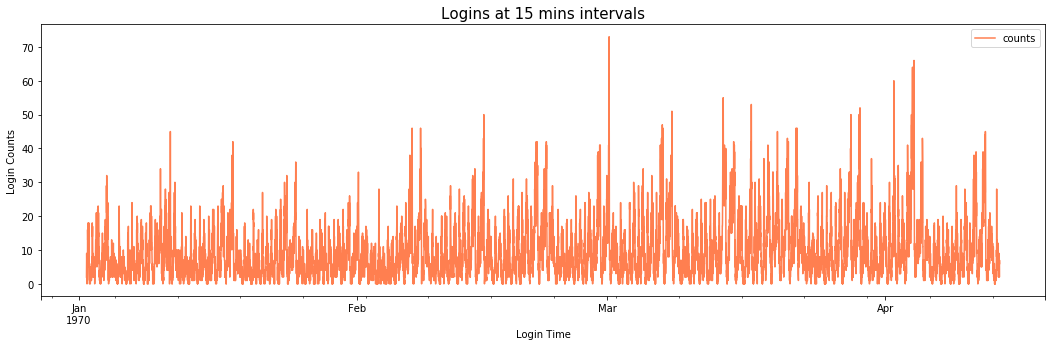

In [6]:
time_df.plot(figsize=(18,5), color='coral')
plt.xlabel('Login Time')
plt.ylabel('Login Counts')
plt.title('Logins at 15 mins intervals', size=15)

**Based on the preliminary visualization of login counts for the whole duration for which data is available, we don't see any particular trend that stand out. It does seem that the number of logins peak at a certain time in March, probably during th ebeginning of the month, where login counts reach upto ~70 in a 15 minute interval. Apart from that the login counts seem to fluctuate between high ad low without a distinct pattern.**

In [7]:
time_df['month'] = time_df.index.month
time_df.head()

,counts,month
login_time,,
1970-01-01 20:00:00,2,1
1970-01-01 20:15:00,6,1
1970-01-01 20:30:00,9,1
1970-01-01 20:45:00,7,1
1970-01-01 21:00:00,1,1


In [8]:
jan_df = time_df[time_df.month==1]
feb_df = time_df[time_df.month==2]
mar_df = time_df[time_df.month==3]
apr_df = time_df[time_df.month==4]

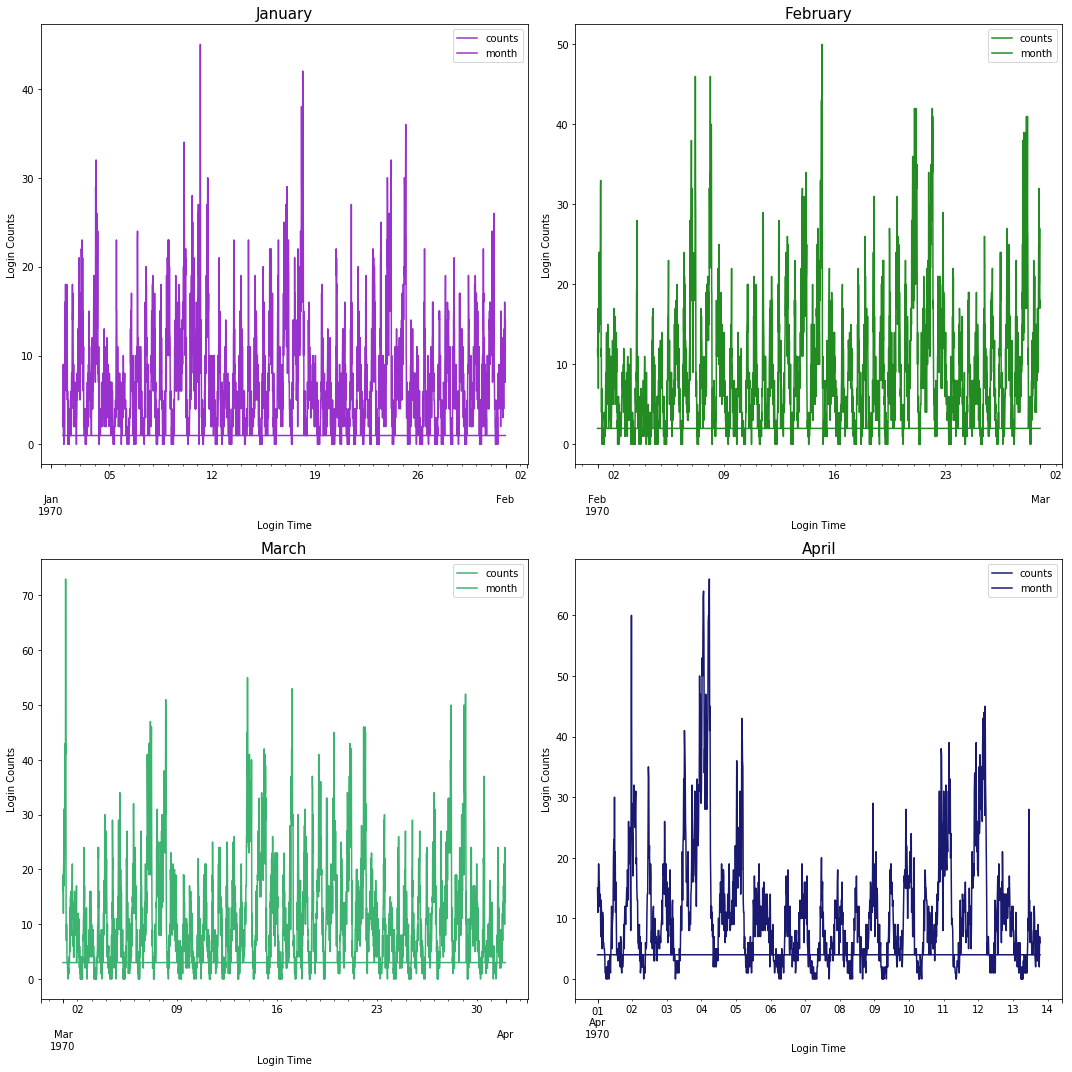

In [9]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
jan_df.plot(color='darkorchid', ax=ax1)
ax1.set_xlabel('Login Time')
ax1.set_ylabel('Login Counts')
ax1.set_title('January', size=15)

feb_df.plot(color='forestgreen', ax=ax2)
ax2.set_xlabel('Login Time')
ax2.set_ylabel('Login Counts')
ax2.set_title('February', size=15)

mar_df.plot(color='mediumseagreen', ax=ax3)
ax3.set_xlabel('Login Time')
ax3.set_ylabel('Login Counts')
ax3.set_title('March', size=15)

apr_df.plot(color='midnightblue', ax=ax4)
ax4.set_xlabel('Login Time')
ax4.set_ylabel('Login Counts')
ax4.set_title('April', size=15)

plt.tight_layout()

**Plotting the login counts at 15 min intervals month-wise helps us visualize the trends of login counts per month. The number of logins peak at different times in different months. In January, the most number of logins in a given 15 min interval is 45, for February the count is 50. In the beginning of March it rises to 70 logins. For April, we just have data upto April 14th and the most number of login is about 65. The general trend seems to suggest that the overall nummber of logins in March and April are more than January and February.**

In [10]:
time_df['weekday'] = time_df.index.weekday_name
time_df.head()

,counts,month,weekday
login_time,,,
1970-01-01 20:00:00,2,1,Thursday
1970-01-01 20:15:00,6,1,Thursday
1970-01-01 20:30:00,9,1,Thursday
1970-01-01 20:45:00,7,1,Thursday
1970-01-01 21:00:00,1,1,Thursday


In [11]:
weekday_df =time_df.groupby('weekday').count()
weekday_df = weekday_df.drop('month', 1)

Text(0.5,1,'logins per weekday')

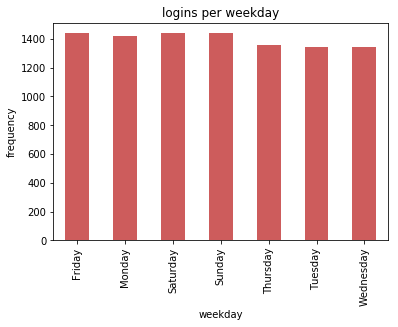

In [12]:
weekday_df.plot(kind='bar', legend=False, color='indianred')
plt.ylabel('frequency')
plt.title('logins per weekday')

**Plotting the total number of logins per each weekday did not provide much insight as the number of logins on different days doesn't seem to change alot. In general Friday, Saturaday and Sunday have more logins than the weekdays.**

### Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

* **The profit made would be a good metric for assessing Ultimate's expereiment. Here, net profit would be profit made with the cost of reimburing toll deducted. If the net profit increases with the new plan then, it would be considered a success for Ultimate technomlogies and they would want to continue it.**

* **An A/B test would be the best way to run the experiment in this scenario. It would help us perform statistical analysis to determine which varialtion performs better for a given conversion goal.**

> a. We would first divide the drivers into 2 groups - one would be the control group and the other would be the experiment group. The control group drivers would not be reimbursed for the toll while the experiment group drivers would be. Average profits for each of the groups would be compared to see if they are equal or if one is greater than the other. 

> b. **H0 (Null Hypothesis)** - Average profit for control group = Average profit for experiment group. <br>
     **H1 (Alternate Hypothesis)** - Average profit for control group != Average profit for experiment group. <br>
     We would run a 2-sample 2-tailed t-test.
     
> c. We would set a significance level alpha=0.05 and compare the obtained p-value from the above statistical test. If we find the p-value is low, then there is no apparent difference between the two groups and the company should continue their functions as the control group. But if the p-value is higher than the threshold then we can conclude that reimbursing the drivers for toll does change their profit margin. And they should considere implementing this on all their drivers. <br>

>**Caveats:** It is important to make sure the experiment is run on weekends to now skew the data points. Also, we should have enough data points in order to make a conclusive change, so as to account for all possible variables such as weather on a given day, special holiday, etc.

### Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).

In [13]:
df = json.load(open('ultimate_data_challenge.json'))
df = pd.DataFrame(df)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [15]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


* Deal with missing values in avg_rating_by_driver and avg_rating_for_driver and phone. We will drop the missing values, since they are fewer in number as compared to the entire dataset.

In [16]:
df = df.dropna(axis=0).reset_index()
df = df.drop('index', axis=1)

Text(0.5,1,'Distribution of average distances')

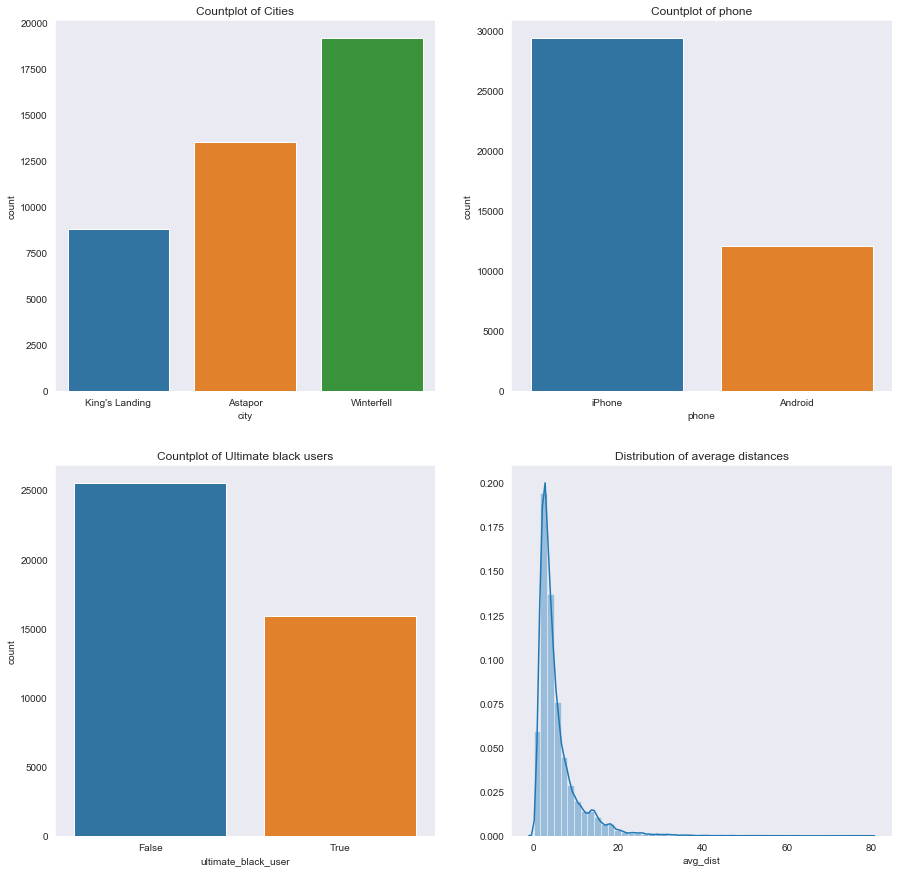

In [17]:
sns.set_style('dark')
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
sns.countplot(df.city, ax=ax1)
ax1.set_title('Countplot of Cities')
sns.countplot(df.phone, ax=ax2)
ax2.set_title('Countplot of phone')
sns.countplot(df.ultimate_black_user, ax=ax3)
ax3.set_title('Countplot of Ultimate black users')
sns.distplot(df.avg_dist, ax=ax4)
ax4.set_title('Distribution of average distances')

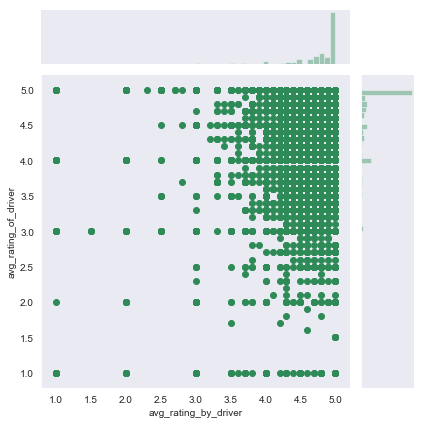

In [18]:
sns.jointplot(x=df.avg_rating_by_driver, y=df.avg_rating_of_driver, color='seagreen')

**Based on the visualizations above, we can gain the following insights from the data:**
* Most of the users sign up from Winterfell.
* Most users use iphone as opposed to android phones.
* Lower proportion of people used the ultimate black service in their first 30 days.
* Average distance is around 7-10 miles.

In [19]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
ret_date = max(df.last_trip_date) - timedelta(days=30)

def retention(date):
    if date >= ret_date:
        return 1
    else:
        return 0
    
df['retained']=df['last_trip_date'].apply(retention)

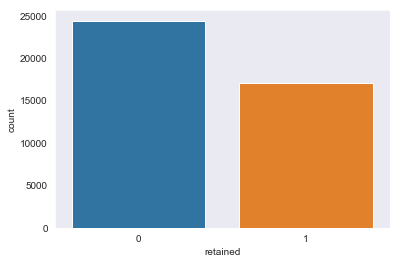

In [20]:
sns.countplot(df.retained)

In [21]:
df['retained'].value_counts(normalize=True) * 100

0    58.897334
1    41.102666
Name: retained, dtype: float64

* **58.9% riders were not retained while, 41.1% were retained based on the data provided.**

Feature engineering and dropping unnecessary and redundant columsn will help us prepare the dataset for machine learning classification. For feture engineering, we use the get dummies function of pandas which one hot encoded the categorical features. In this dataset, the signups are in January and the data is from July, which is a 6 month period so this would be appropriate for our analysis of 6 month retention rate.

In [22]:
city_onehot_features = pd.get_dummies(df['city'])
phone_onehot_features = pd.get_dummies(df['phone'])

In [23]:
df = pd.concat([df, city_onehot_features ,phone_onehot_features], axis=1)

In [24]:
df = df.drop(['city','last_trip_date','phone','signup_date'], 1)

In [25]:
def true_false(boolean):
    if boolean == True:
        return 1
    else:
        return 0
    
df.ultimate_black_user = df.ultimate_black_user.apply(true_false)

In [26]:
df.head()    # dataframe ready for machine learning

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained,Astapor,King's Landing,Winterfell,Android,iPhone
0,3.67,5.0,4.7,1.10,15.4,4,1,46.2,1,0,1,0,0,1
1,8.26,5.0,5.0,1.00,0.0,0,0,50.0,0,1,0,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,0,100.0,0,1,0,0,0,1
3,2.36,4.9,4.6,1.14,20.0,9,1,80.0,1,0,1,0,0,1
4,3.13,4.9,4.4,1.19,11.8,14,0,82.4,0,0,0,1,1,0


In [27]:
X = df.drop(['retained'],1)
y = df.retained

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

* **Next, we will fit the data to different classification algorithms and compare their performance:**
> Logistic Regression <br> Random Forest Classifier <br> XG Boost Classifier

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

test_scores={}
test_scores['LogisticRegression'] = model.score(X_test, y_test)
print("Classification Report:")
print(classification_report(y_test, y_predict))

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.82      0.77      7358
           1       0.67      0.55      0.60      5076

   micro avg       0.71      0.71      0.71     12434
   macro avg       0.70      0.68      0.69     12434
weighted avg       0.70      0.71      0.70     12434



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

test_scores['RandomForestClassifier'] = model.score(X_test, y_test)
print("Classification Report:")
print(classification_report(y_test, y_predict))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      7358
           1       0.71      0.63      0.67      5076

   micro avg       0.75      0.75      0.75     12434
   macro avg       0.74      0.73      0.73     12434
weighted avg       0.74      0.75      0.74     12434



In [31]:
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

test_scores['XGBClassifier'] = model.score(X_test, y_test)
print("Classification Report:")
print(classification_report(y_test, y_predict))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82      7358
           1       0.75      0.71      0.73      5076

   micro avg       0.78      0.78      0.78     12434
   macro avg       0.78      0.77      0.77     12434
weighted avg       0.78      0.78      0.78     12434



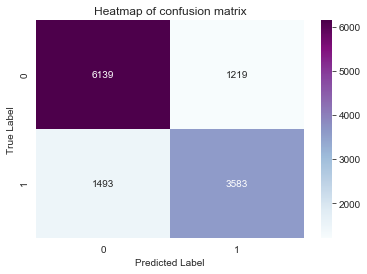

In [32]:
c_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(c_matrix, annot=True, fmt='d', cbar=True, cmap='BuPu')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Heatmap of confusion matrix')
plt.show()

Text(0.5,1,'ROC curve')

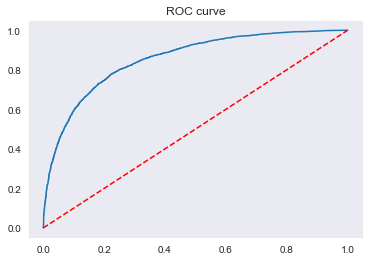

In [33]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve')

In [34]:
test_scores

{'LogisticRegression': 0.7068521795078012,
 'RandomForestClassifier': 0.7463406787839794,
 'XGBClassifier': 0.7818883705967509}

([<matplotlib.axis.XTick at 0x1a20684eb8>,
 <a list of 3 Text xticklabel objects>)

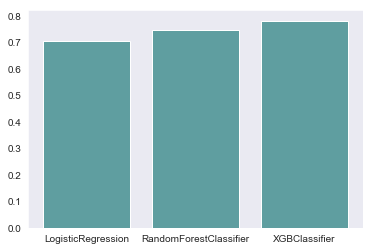

In [35]:
plt.bar(range(len(test_scores)), list(test_scores.values()), align='center', color='cadetblue')
plt.xticks(range(len(test_scores)), list(test_scores.keys()))

In [36]:
feature_imp = pd.DataFrame(index=X.columns, data=model.feature_importances_,
                       columns=['Feature Importance']).sort_values(by='Feature Importance', ascending=False)
feature_imp

,Feature Importance
avg_dist,0.161660
trips_in_first_30_days,0.134478
weekday_pct,0.128755
avg_rating_by_driver,0.113019
surge_pct,0.100143
King's Landing,0.077253
Android,0.064378
avg_rating_of_driver,0.057225
ultimate_black_user,0.057225
Astapor,0.052933


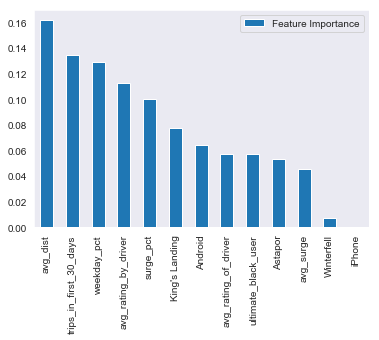

In [37]:
feature_imp.plot(kind='bar')

* **XGB Classifier seems to perform the best among the different classification algorithms which gave a score of ~78%. The top three features which are most important for classification are:**
>Average trip distance, number of trips made in first 30 days, percentage of user's trips during weekday.

**This suggests that the behaviour of user, usage of rides is the most important determinig factor for retention rate after six months.**